In [25]:

import spotipy
from spotipy.oauth2 import SpotifyOAuth

# Spotify API credentials
CLIENT_ID = 'b67aae9be7b345ada2554929750d577e'
CLIENT_SECRET = '1f4f4e34cec74f1db4a910b1d39e7e52'
REDIRECT_URI = 'http://localhost:8888/callback'

# Define scope for accessing listening history and recommendations
SCOPE = 'user-read-recently-played user-top-read user-library-read'

# Authenticate and get token
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    redirect_uri=REDIRECT_URI,
    scope=SCOPE
))

# Function to fetch recently played tracks
def get_recently_played(limit=20):
    try:
        print("Fetching recently played tracks...")
        results = sp.current_user_recently_played(limit=limit)
        for idx, item in enumerate(results['items']):
            track = item['track']
            print(f"{idx + 1}: {track['name']} by {', '.join([artist['name'] for artist in track['artists']])}")
    except Exception as e:
        print(f"Error fetching recently played tracks: {e}")

# Function to fetch top artists and genres
def get_top_artists_and_genres(limit=10, time_range='short_term'):
    try:
        print("Fetching top artists and genres (short term)...")
        results = sp.current_user_top_artists(limit=limit, time_range=time_range)
        artist_ids = [artist['id'] for artist in results['items']]
        print("Top Artists:")
        for idx, artist in enumerate(results['items']):
            print(f"{idx + 1}: {artist['name']} - Genres: {', '.join(artist['genres'])}")
        return artist_ids
    except Exception as e:
        print(f"Error fetching top artists: {e}")
        return []

# Function to fetch top tracks
def get_top_tracks(limit=10, time_range='short_term'):
    try:
        print("Fetching top tracks (short term)...")
        results = sp.current_user_top_tracks(limit=limit, time_range=time_range)
        track_ids = [track['id'] for track in results['items']]
        print("Top Tracks:")
        for idx, track in enumerate(results['items']):
            print(f"{idx + 1}: {track['name']} by {', '.join([artist['name'] for artist in track['artists']])}")
        return track_ids
    except Exception as e:
        print(f"Error fetching top tracks: {e}")
        return []

# Function to fetch song recommendations based on a seed
def get_recommendations(seed_tracks=None, seed_artists=None, seed_genres=None, limit=10):
    try:
        print("Fetching song recommendations...")
        results = sp.recommendations(
            seed_tracks=seed_tracks,
            seed_artists=seed_artists,
            seed_genres=seed_genres,
            limit=limit
        )
        print("Recommended Tracks:")
        for idx, track in enumerate(results['tracks']):
            print(f"{idx + 1}: {track['name']} by {', '.join([artist['name'] for artist in track['artists']])}")
    except Exception as e:
        print(f"Error fetching recommendations: {e}")

# Example usage
if __name__ == "__main__":
    print("Fetching recently played tracks...")
    get_recently_played()

    print("\nFetching top artists and genres...")
    top_artist_ids = get_top_artists_and_genres(limit=3)  # Fetch top 3 artist IDs

    print("\nFetching top tracks...")
    top_track_ids = get_top_tracks(limit=3)  # Fetch top 3 track IDs

    print("\nFetching song recommendations...")
    # Use fetched IDs for recommendations
    get_recommendations(seed_artists=top_artist_ids, seed_tracks=top_track_ids, limit=5)


Fetching recently played tracks...
Fetching recently played tracks...


Couldn't write token to cache at: .cache


1: Beni Sorma Ellere by Aysel Yakupoğlu
2: Sevemem Artık by Aysel Yakupoğlu, Ömer Çakır
3: Ağlamam Ondan by Cengiz Kurtoğlu
4: Seyreyle Güzel by Nurullah Akçayır, İbrahim Erkal
5: Hasbi Rabbi by Geeflow
6: Ay Doğdu Üzerimize by İlahi Nidalar
7: Kardan Aydınlık by Teymullah
8: Abdulkadir Geylani by Mahmut Durgun
9: Moments - Ben Böhmer & Nils Hoffmann Remix by Kidnap, Leo Stannard, Ben Böhmer, Nils Hoffmann
10: Body on Fire by SOMMA, Dillistone
11: Price by PALASTIC
12: Heaven by James Carter
13: Feel (feat. Sena Sener) - Radio Edit by Mahmut Orhan, Sena Şener
14: Love Tonight (Robin Schulz Remix) by Shouse, Robin Schulz
15: Your Love (9PM) by ATB, Topic, A7S
16: Rasputin by Majestic, Boney M.
17: Gimme Gimme Gimme (a man after midnight) by Syzz
18: Won't Forget You (Edit) by Shouse
19: Kalbim Usandı by Nahide Babashlı
20: Cold Water by Kidnap, LYDY MAY

Fetching top artists and genres...
Fetching top artists and genres (short term)...


Couldn't write token to cache at: .cache


Top Artists:
1: Semicenk - Genres: turkish pop
2: BLOK3 - Genres: turkce drill
3: Dedublüman - Genres: turkce slow sarkilar

Fetching top tracks...
Fetching top tracks (short term)...


Couldn't write token to cache at: .cache


Top Tracks:
1: Gönlüm by Electro Tülay
2: Won't Forget You (Edit) by Shouse
3: Hüznü Hecem by Yener Çevik

Fetching song recommendations...
Fetching song recommendations...


Couldn't write token to cache at: .cache
HTTP Error for GET to https://api.spotify.com/v1/recommendations with Params: {'limit': 5, 'seed_artists': '1CcZoULzFHa8Uhwo6OlQcp,1GMwSpFzrLd12jUX15bHB6,5PRW6j58xEEWL4DDVEITKT', 'seed_tracks': '5kGvQXOy9zumMUtmaYn2A9,3I10tZ5MgEMo4WryCNJkZQ,3OKCljxHDet7MaQ83o6l6s'} returned 404 due to None


Error fetching recommendations: http status: 404, code:-1 - https://api.spotify.com/v1/recommendations?limit=5&seed_artists=1CcZoULzFHa8Uhwo6OlQcp%2C1GMwSpFzrLd12jUX15bHB6%2C5PRW6j58xEEWL4DDVEITKT&seed_tracks=5kGvQXOy9zumMUtmaYn2A9%2C3I10tZ5MgEMo4WryCNJkZQ%2C3OKCljxHDet7MaQ83o6l6s:
 None, reason: None


Couldn't write token to cache at: .cache


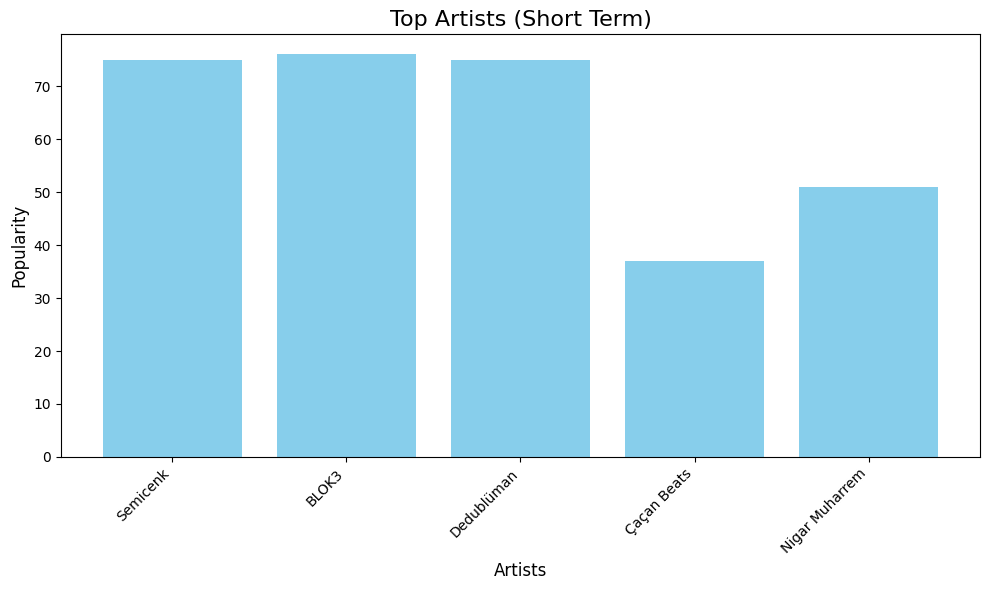

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_top_artists(artists):
    artist_names = [artist['name'] for artist in artists]
    artist_popularity = [artist['popularity'] for artist in artists]

    plt.figure(figsize=(10, 6))
    plt.bar(artist_names, artist_popularity, color='skyblue')
    plt.title('Top Artists (Short Term)', fontsize=16)
    plt.xlabel('Artists', fontsize=12)
    plt.ylabel('Popularity', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Example usage with data from Spotify API
top_artists_data = sp.current_user_top_artists(limit=5, time_range='short_term')['items']
plot_top_artists(top_artists_data)


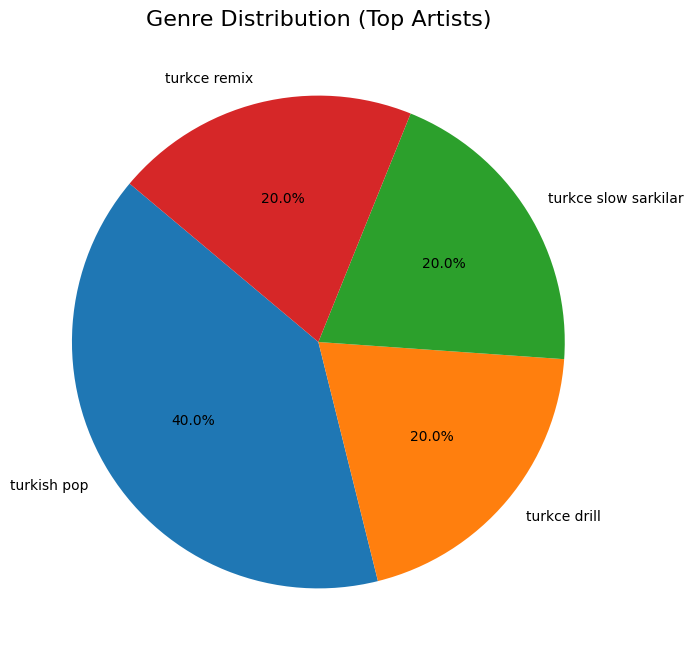

In [9]:
def plot_genre_distribution(artists):
    genre_counts = {}
    for artist in artists:
        for genre in artist['genres']:
            genre_counts[genre] = genre_counts.get(genre, 0) + 1

    genres = list(genre_counts.keys())
    counts = list(genre_counts.values())

    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=genres, autopct='%1.1f%%', startangle=140)
    plt.title('Genre Distribution (Top Artists)', fontsize=16)
    plt.show()

# Example usage
plot_genre_distribution(top_artists_data)
